In [1]:
import pandas as pd
import smogn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading data
df = pd.read_csv('../data/train-halos_and_gals.csv')
df.shape

(1211, 6)

In [3]:
#Stellar Mass
df_sm = smogn.smoter(data = df, y = "M_g")

r_index: 100%|##########| 187/187 [00:00<00:00, 642.90it/s]


In [4]:
#Color
rg_mtrx = [
    [-0.55, 1, 0],  ## over-sample ("minority")
    [1.0, 0, 0],  ## under-sample ("majority")
    [1.1, 1, 0],  ## over-sample ("minority")
]

df_color = smogn.smoter(
    
    ## main arguments
    data = df,              ## pandas dataframe
    y = 'color_g',          ## string ('header name')
    k = 7,                    ## positive integer (k < n)
    pert = 0.04,              ## real number (0 < R < 1)
    samp_method = 'balance',  ## string ('balance' or 'extreme')
    drop_na_col = True,       ## boolean (True or False)
    drop_na_row = True,       ## boolean (True or False)
    replace = False,          ## boolean (True or False)

    ## phi relevance arguments
    rel_thres = 0.8,          ## real number (0 < R < 1)
    rel_method = 'manual',    ## string ('auto' or 'manual')
    rel_ctrl_pts_rg = rg_mtrx ## 2d array (format: [x, y])
)


r_index: 100%|##########| 24/24 [00:00<00:00, 547.65it/s]


In [5]:
#SFR
rg_mtrx = [
    [6.25, 1, 0],  ## over-sample ("minority")
    [6.6, 0, 0],  ## over-sample ("majority")
    [8.5, 0, 0],  ## over-sample ("majority")
    [9., 1, 0],  ## over-sample ("minority")
]

df_sfr = smogn.smoter(
    
    ## main arguments
    data = df,           ## pandas dataframe
    y = 'SFR_g',          ## string ('header name')
    k = 7,                    ## positive integer (k < n)
    pert = 0.04,              ## real number (0 < R < 1)
    samp_method = 'balance',  ## string ('balance' or 'extreme')
    drop_na_col = True,       ## boolean (True or False)
    drop_na_row = True,       ## boolean (True or False)
    replace = False,          ## boolean (True or False)

    ## phi relevance arguments
    rel_thres = 0.2,         ## real number (0 < R < 1)
    rel_method = 'manual',    ## string ('auto' or 'manual')
    rel_ctrl_pts_rg = rg_mtrx ## 2d array (format: [x, y])
)

r_index: 100%|##########| 170/170 [00:00<00:00, 642.07it/s]


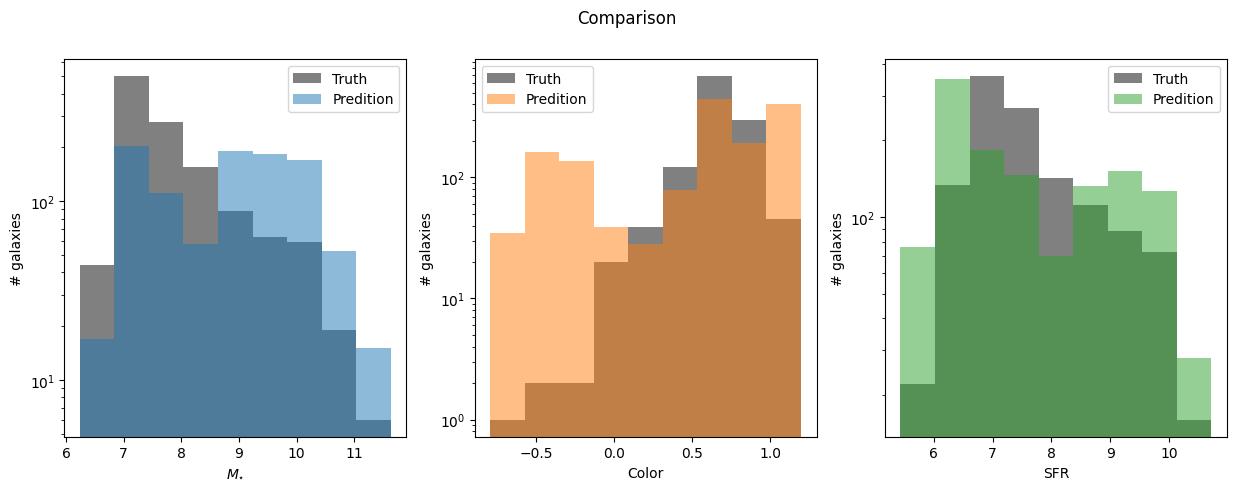

In [6]:
fig = plt.figure(dpi = 100, figsize = (15, 5))
gs = fig.add_gridspec(1, 3)
axs = gs.subplots()

fig.suptitle('Comparison')

bins = np.linspace(np.min(df['M_g']), np.max(df['M_g']), 10)
axs[0].hist(df['M_g'], bins = bins, color = 'gray', label = 'Truth')
axs[0].hist(df_sm['M_g'], bins = bins, color = 'C0', alpha = 0.5, label = 'Predition')
axs[0].set_xlabel(r'$M_{\star}$')
axs[0].set_ylabel(r'# galaxies')
axs[0].legend()
axs[0].set_yscale('log')

bins = np.linspace(np.min(df['color_g']), np.max(df['color_g']), 10)
axs[1].hist(df['color_g'], bins = bins, color = 'gray', label = 'Truth')
axs[1].hist(df_color['color_g'], bins = bins, color = 'C1', alpha = 0.5, label = 'Predition')
axs[1].set_xlabel(r'Color')
axs[1].set_ylabel(r'# galaxies')
axs[1].legend()
axs[1].set_yscale('log')

bins = np.linspace(np.min(df['SFR_g']), np.max(df['SFR_g']), 10)
axs[2].hist(df['SFR_g'], bins = bins, color = 'gray', label = 'Truth')
axs[2].hist(df_sfr['SFR_g'], bins = bins, color = 'C2', alpha = 0.5, label = 'Predition')
axs[2].set_xlabel(r'SFR')
axs[2].set_ylabel(r'# galaxies')
axs[2].legend()
axs[2].set_yscale('log')

In [7]:
#Saving the augmented data
df_sm.to_csv('../data/stellar_mass-smoogn_data.csv')
df_color.to_csv('../data/color-smoogn_data.csv')
df_sfr.to_csv('../data/SFR-smoogn_data.csv')